<h1>E-Commerce Customer Churn Prediction</h1>


<p>In the rapidly evolving world of e-commerce, understanding customer behavior is crucial for the growth and sustainability of online businesses. One of the key metrics that businesses need to monitor closely is customer churn, also known as customer attrition.</p>
<p>Customer churn refers to the scenario when a customer stops doing business or ends the relationship with a company. Predicting customer churn involves using data analysis and machine learning techniques to predict the likelihood of a customer leaving a service or product.</p>
<p>In the context of e-commerce, customer churn prediction can help businesses identify potential churners early on and take appropriate actions to retain them, thereby saving on the cost of acquiring new customers. This process involves analyzing various customer-related factors such as purchase history, customer engagement, product preference, and many others.</p>

<p>E-commerce customer churn prediction is a crucial area of research that utilizes various machine learning algorithms to forecast whether customers will continue their engagement with an online platform or discontinue their relationship. Several studies have explored this field, demonstrating the application of different predictive models and algorithms to tackle this challenge.</p>

<h3>Objectives</h3>

* To perform a comprehensive analysis of the provided customer data to extract insights into customer behavior and characteristics.
* To construct a machine learning model that can accurately predict customers who are likely to churn. This model should leverage the provided variables to identify at-risk customers.

<h2>Dataset Description</h2>

<!DOCTYPE html>
<html>
    <table style="width:100%">
        <tr>
            <td><b>Variable</b></td>
            <td><b>Description</b></td>
        </tr>
        <tr>
            <td>CustomerID</td>
            <td>Unique customer ID</td>
        </tr>
        <tr>
            <td>Churn</td>
            <td>Churn Flag</td>
        </tr>
        <tr>
            <td>Tenure</td>
            <td>Tenure of customer in organization</td>
        </tr>
        <tr>
            <td>PreferredLoginDevice</td>
            <td>Preferred login device of customer</td>
        </tr>
        <tr>
            <td>CityTier</td>
            <td>City tier</td>
        </tr>
        <tr>
            <td>WarehouseToHome</td>
            <td>Distance between warehouse to home of customer</td>
        </tr>
        <tr>
            <td>PreferredPaymentMode</td>
            <td>Preferred payment method of customer</td>
        </tr>
        <tr>
            <td>Gender</td>
            <td>Gender of Customer</td>
        </tr>
        <tr>
            <td>HourSpendOnApp</td>
            <td>Number of hours spend on mobile application or website</td>
        </tr>
        <tr>
            <td>NumberOfDeviceRegistered</td>
            <td>Total Number of devices is registered on particular customer</td>
        </tr>
        <tr>
            <td>PreferredOrderCat</td>
            <td>Preferred order category of customer in last month</td>
        </tr>
        <tr>
            <td>SatisfactionScore</td>
            <td>Satisfactory score of customer on service</td>
        </tr>
        <tr>
            <td>MaritalStatus</td>
            <td>Marital status of customer</td>
        </tr>
        <tr>
            <td>NumberOfAddress</td>
            <td>Total number of added address on particular customer</td>
        </tr>
        <tr>
            <td>Complain</td>
            <td>Any complaint has been raised in last month</td>
        </tr>
        <tr>
            <td>OrderAmountHikeFromLastYear</td>
            <td>Percentage increases in order from last year</td>
        </tr>
        <tr>
            <td>CouponUsed</td>
            <td>Total number of coupon used in last month</td>
        </tr>
        <tr>
            <td>OrderCount</td>
            <td>Total number of orders has been placed in last month</td>
        </tr>
        <tr>
            <td>DaySinceLastOrder</td>
            <td>Day since last order by customer</td>
        </tr>
        <tr>
            <td>CashbackAmount</td>
            <td>Average cashback in last month</td>
        </tr>
</html>

<h4>Importing important libraries</h4>

In [ ]:
pip install squarify

In [ ]:
# importing important libraries for data preprocessing, visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import squarify

warnings.filterwarnings("ignore")

<h3>Data Collection</h3>

In [ ]:
#reading the excel file
churn_data = pd.read_excel("/content/E Commerce Dataset.xlsx", sheet_name = "E Comm")

In [ ]:
churn_data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


<h3>Data Preparation</h3>

<h5>Data Information</h5>

In [ ]:
#print the rows and columns present in the dataset
print(f'No. of Rows - {churn_data.shape[0]}')
print(f'No. of Columns - {churn_data.shape[1]}')

No. of Rows - 5630
No. of Columns - 20


In [ ]:
#print the information of the dataset
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
churn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [ ]:
#print the null values present in the dataset
churn_data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

<h5>Missing Values in the dataset</h5>

* Tenure - 255
* WarehouseToHome - 251
* HourSpendOnApp - 255
* OrderAmountHikeFromlastYear - 265
* CouponUsed - 256
* OrderCount - 258
* DaySinceLastOrder - 307              

In [ ]:
#separate the variables into numerical and object data types
churn_obj = churn_data.select_dtypes(include = ['object'])
churn_num = churn_data.select_dtypes(include = ['int', 'float'])

In [ ]:
churn_data['Churn'].value_counts().to_frame().reset_index()

,Churn,count
0,0,4682
1,1,948


<h3>Data Cleaning</h3>

<h4>Tenure</h4>

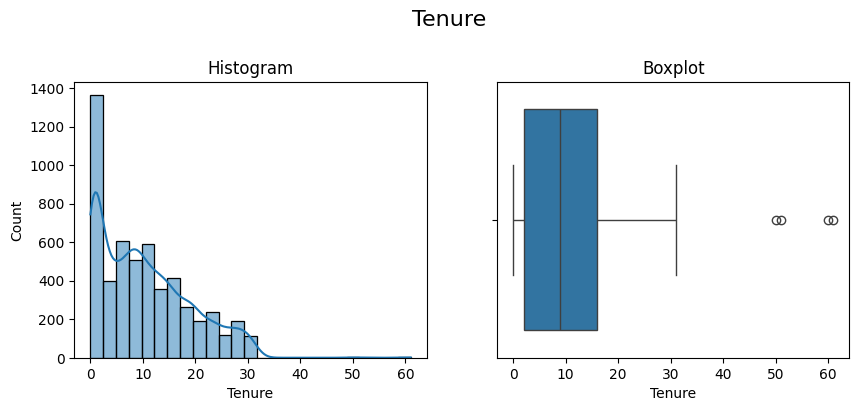

In [ ]:
#data cleaning for tenure variable
fig, axes = plt.subplots(1,2, figsize = (10,4))
fig.suptitle('Tenure', fontsize=16)
plt.subplots_adjust(top=0.80)
sns.histplot(churn_data['Tenure'],kde = True,bins = 25, ax = axes[0])
axes[0].set_title('Histogram')
sns.boxplot(churn_data['Tenure'], ax = axes[1], orient = 'h')
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Tenure')
plt.show()

In [ ]:
churn_data['Tenure'].value_counts().head()

Tenure
1.0    690
0.0    508
8.0    263
9.0    247
7.0    221
Name: count, dtype: int64

<b>Tenure</b> variable is right skewed as seen in the histogram. Also the count of customer having tenure either <b>0</b> or <b>1</b>.<br>
This indicates the maximum customer are new customers to the company.<br>
In order to handle the missing values of this variable we will use *<b>Median</b>* as to impute the value.

In [ ]:
pd.DataFrame(churn_data['Tenure'].describe())

Handling the missing values of <b>Tenure</b> by imputing with Median value i.e <b>*9.0*</b>

In [ ]:
churn_data['Tenure'] = churn_data['Tenure'].fillna(9.0)

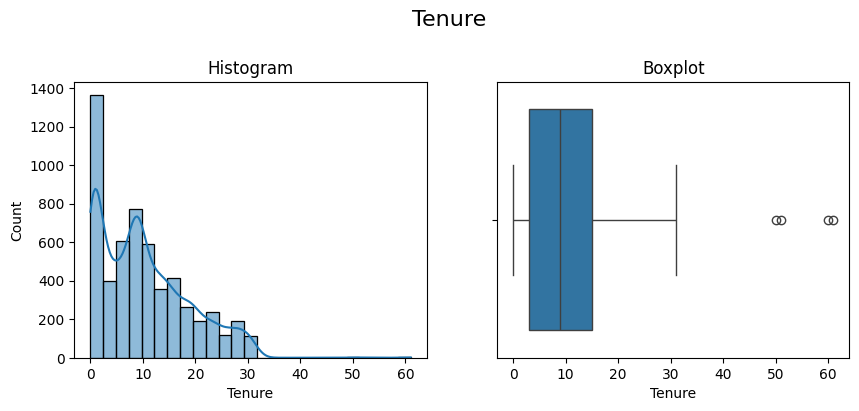

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (10,4))
fig.suptitle('Tenure', fontsize=16)
plt.subplots_adjust(top=0.80)
sns.histplot(churn_data['Tenure'],kde = True,bins = 25, ax = axes[0])
axes[0].set_title('Histogram')
sns.boxplot(churn_data['Tenure'], ax = axes[1], orient = 'h')
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Tenure')
plt.show()

<h4>WarehouseToHome</h4>

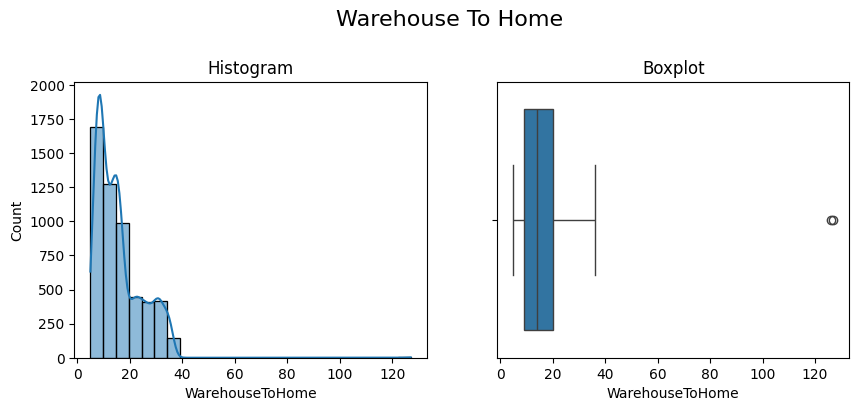

In [ ]:
#datacleaning for warehouse to home
fig, axes = plt.subplots(1,2, figsize = (10,4))
fig.suptitle('Warehouse To Home', fontsize=16)
plt.subplots_adjust(top=0.80)
sns.histplot(churn_data['WarehouseToHome'],kde = True,bins = 25, ax = axes[0])
axes[0].set_title('Histogram')
sns.boxplot(churn_data['WarehouseToHome'], ax = axes[1], orient = 'h')
axes[1].set_title('Boxplot')
axes[1].set_xlabel('WarehouseToHome')
plt.show()

<b>Warehouse To Home</b> variable is right skewed as seen in the histogram.<br>
The customers live around the Warehouse range.<br>
Imputing the na values with median.

In [ ]:
pd.DataFrame(churn_data['WarehouseToHome'].describe())

,WarehouseToHome
count,5379.000000
mean,15.639896
std,8.531475
min,5.000000
25%,9.000000
50%,14.000000
75%,20.000000
max,127.000000


Imputing the NA values of <b>WarehouseToHome</b> with median i.e. *<b>14.0</b>*

In [ ]:
churn_data['WarehouseToHome'] = churn_data['WarehouseToHome'].fillna(14.0)

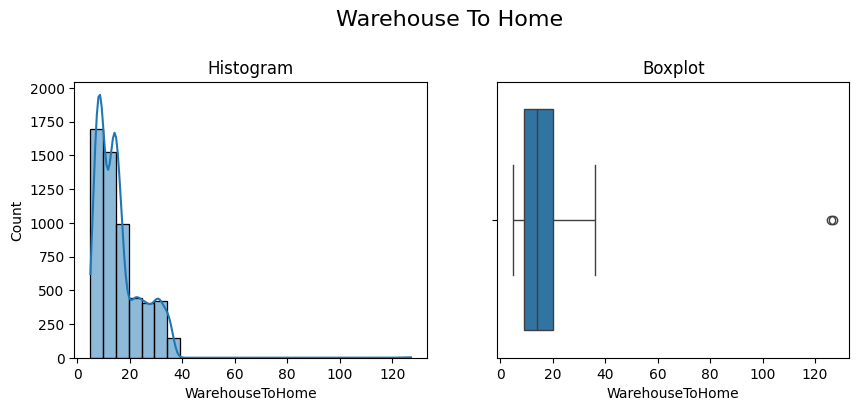

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (10,4))
fig.suptitle('Warehouse To Home', fontsize=16)
plt.subplots_adjust(top=0.80)
sns.histplot(churn_data['WarehouseToHome'],kde = True,bins = 25, ax = axes[0])
axes[0].set_title('Histogram')
sns.boxplot(churn_data['WarehouseToHome'], ax = axes[1], orient = 'h')
axes[1].set_title('Boxplot')
axes[1].set_xlabel('WarehouseToHome')
plt.show()

<h4>HourSpendOnApp</h4>

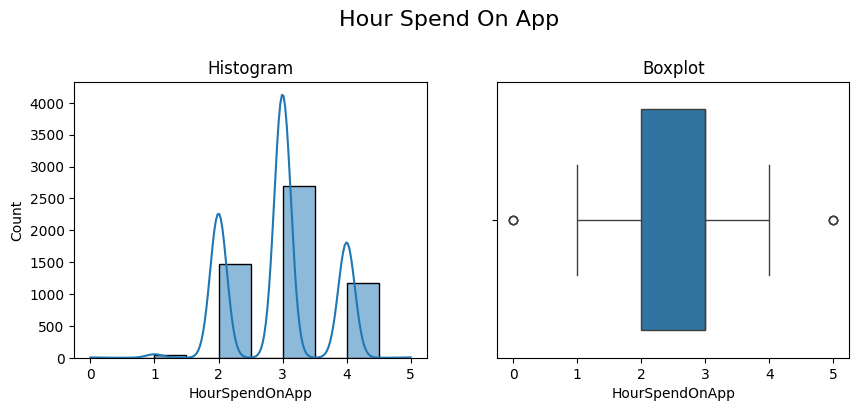

In [ ]:
#datacleaning for hour spend on app
fig, axes = plt.subplots(1,2, figsize = (10,4))
fig.suptitle('Hour Spend On App', fontsize=16)
plt.subplots_adjust(top=0.80)
sns.histplot(churn_data['HourSpendOnApp'],kde = True,bins = 10, ax = axes[0])
axes[0].set_title('Histogram')
sns.boxplot(churn_data['HourSpendOnApp'], ax = axes[1], orient = 'h')
axes[1].set_title('Boxplot')
axes[1].set_xlabel('HourSpendOnApp')
plt.show()

<b>HourSpendOnApp</b> is a discrete variable. Therefore we will fill the missing values with <b>Mode</b> of the variable.

In [ ]:
pd.DataFrame(churn_data['HourSpendOnApp'].value_counts()).reset_index()

The mode of the <b>HourSpendOnApp</b> is <b>*3.0*</b>

In [ ]:
churn_data['HourSpendOnApp'] = churn_data['HourSpendOnApp'].fillna(3.0)

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (10,4))
fig.suptitle('Hour Spend On App', fontsize=16)
plt.subplots_adjust(top=0.80)
sns.histplot(churn_data['HourSpendOnApp'],kde = True,bins = 10, ax = axes[0])
axes[0].set_title('Histogram')
sns.boxplot(churn_data['HourSpendOnApp'], ax = axes[1], orient = 'h')
axes[1].set_title('Boxplot')
axes[1].set_xlabel('HourSpendOnApp')
plt.show()

<h4>OrderAmountHikeFromLastYear</h4>

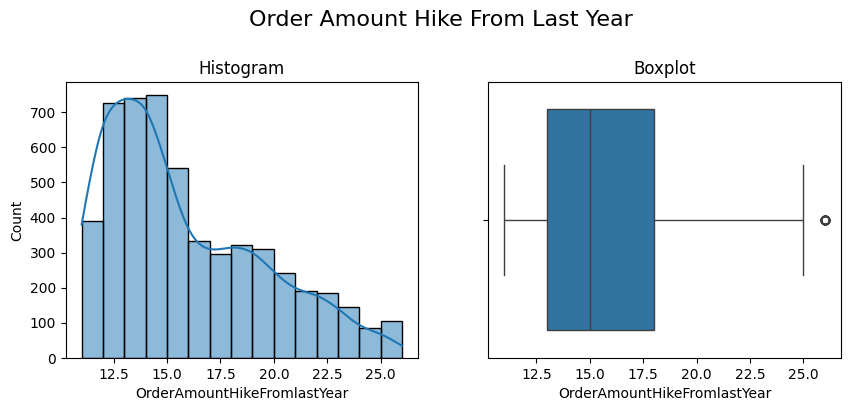

In [ ]:
#datacleaning for order amount hike from last year
fig, axes = plt.subplots(1,2, figsize = (10,4))
fig.suptitle('Order Amount Hike From Last Year', fontsize=16)
plt.subplots_adjust(top=0.80)
sns.histplot(churn_data['OrderAmountHikeFromlastYear'],kde = True,bins = 15, ax = axes[0])
axes[0].set_title('Histogram')
sns.boxplot(churn_data['OrderAmountHikeFromlastYear'], ax = axes[1], orient = 'h')
axes[1].set_title('Boxplot')
axes[1].set_xlabel('OrderAmountHikeFromlastYear')
plt.show()

<b>OrderAmountHikeFromlastYear</b> is right skewed and is a continuos variable.<br>
The value of NA will be replaced by <b>Mean</b> of the data.

In [ ]:
pd.DataFrame(churn_data['OrderAmountHikeFromlastYear'].describe())

In [ ]:
churn_data['OrderAmountHikeFromlastYear'] = churn_data['OrderAmountHikeFromlastYear'].fillna(np.round(churn_data['OrderAmountHikeFromlastYear'].mean(),2))

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (10,4))
fig.suptitle('Order Amount Hike From Last Year', fontsize=16)
plt.subplots_adjust(top=0.80)
sns.histplot(churn_data['OrderAmountHikeFromlastYear'],kde = True,bins = 15, ax = axes[0])
axes[0].set_title('Histogram')
sns.boxplot(churn_data['OrderAmountHikeFromlastYear'], ax = axes[1], orient = 'h')
axes[1].set_title('Boxplot')
axes[1].set_xlabel('OrderAmountHikeFromlastYear')
plt.show()

<h4>CouponUsed</h4>

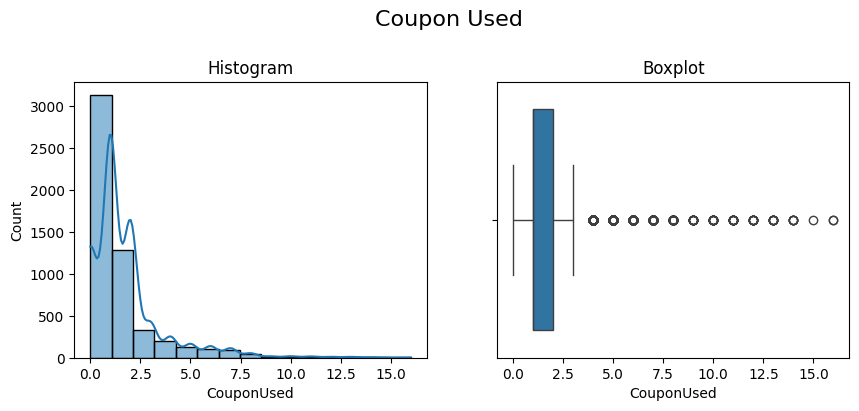

In [ ]:
#datacleaning for coupon used
fig, axes = plt.subplots(1,2, figsize = (10,4))
fig.suptitle('Coupon Used', fontsize=16)
plt.subplots_adjust(top=0.80)
sns.histplot(churn_data['CouponUsed'],kde = True,bins = 15, ax = axes[0])
axes[0].set_title('Histogram')
sns.boxplot(churn_data['CouponUsed'], ax = axes[1], orient = 'h')
axes[1].set_title('Boxplot')
axes[1].set_xlabel('CouponUsed')
plt.show()

<b>CouponUsed</b> is right skewed. The NA values can be filled by either <b>Mean</b> or br <b>Median</b>.

In [ ]:
pd.DataFrame(churn_data['CouponUsed'].describe())

In [ ]:
churn_data['CouponUsed'] = churn_data['CouponUsed'].fillna(np.round(churn_data['CouponUsed'].mean(),2))

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (10,4))
fig.suptitle('Coupon Used', fontsize=16)
plt.subplots_adjust(top=0.80)
sns.histplot(churn_data['CouponUsed'],kde = True,bins = 15, ax = axes[0])
axes[0].set_title('Histogram')
sns.boxplot(churn_data['CouponUsed'], ax = axes[1], orient = 'h')
axes[1].set_title('Boxplot')
axes[1].set_xlabel('CouponUsed')
plt.show()

<h4>OrderCount</h4>

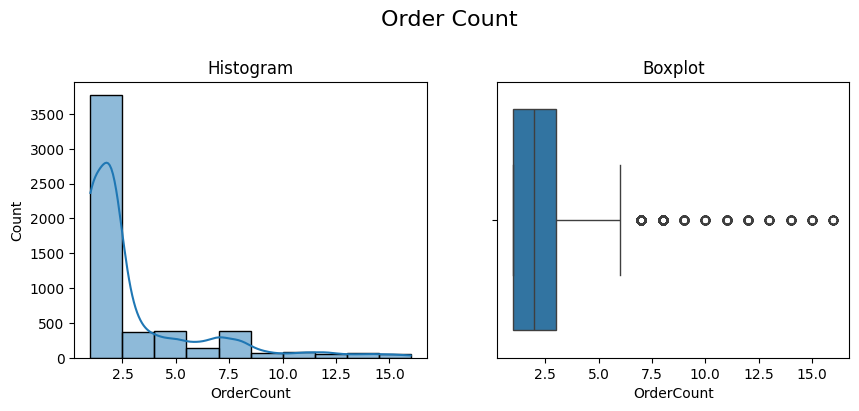

In [ ]:
#datacleaning for order count
fig, axes = plt.subplots(1,2, figsize = (10,4))
fig.suptitle('Order Count', fontsize=16)
plt.subplots_adjust(top=0.80)
sns.histplot(churn_data['OrderCount'],kde = True,bins = 10, ax = axes[0])
axes[0].set_title('Histogram')
sns.boxplot(churn_data['OrderCount'], ax = axes[1], orient = 'h')
axes[1].set_title('Boxplot')
axes[1].set_xlabel('OrderCount')
plt.show()

<b>OrderCount</b> is right skewed. Since the Order Count consists of total number of placed orders in last month, therfore the NA values needs to be filled with the mode of the variable.

In [ ]:
pd.DataFrame(churn_data['OrderCount'].value_counts()).reset_index().head()

In [ ]:
churn_data['OrderCount'] = churn_data['OrderCount'].fillna(2.0)

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (10,4))
fig.suptitle('Order Count', fontsize=16)
plt.subplots_adjust(top=0.80)
sns.histplot(churn_data['OrderCount'],kde = True,bins = 10, ax = axes[0])
axes[0].set_title('Histogram')
sns.boxplot(churn_data['OrderCount'], ax = axes[1], orient = 'h')
axes[1].set_title('Boxplot')
axes[1].set_xlabel('OrderCount')
plt.show()

<h4>DaySinceLastOrder</h4>

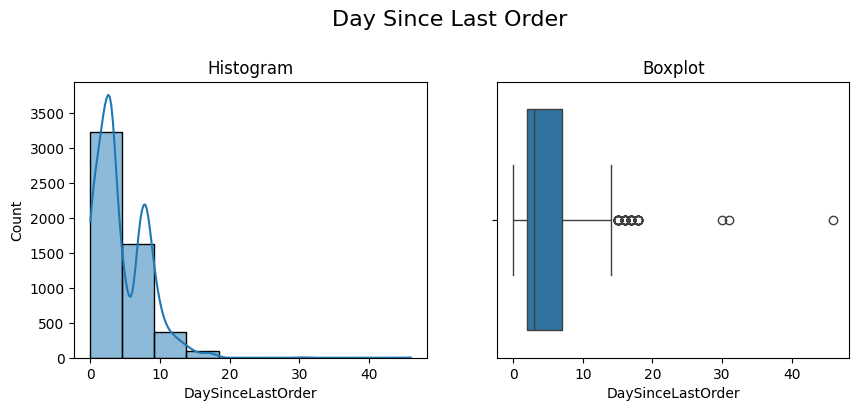

In [ ]:
#data cleaning for day since last order
fig, axes = plt.subplots(1,2, figsize = (10,4))
fig.suptitle('Day Since Last Order', fontsize=16)
plt.subplots_adjust(top=0.80)
sns.histplot(churn_data['DaySinceLastOrder'],kde = True,bins = 10, ax = axes[0])
axes[0].set_title('Histogram')
sns.boxplot(churn_data['DaySinceLastOrder'], ax = axes[1], orient = 'h')
axes[1].set_title('Boxplot')
axes[1].set_xlabel('DaySinceLastOrder')
plt.show()

<b>DaySinceLastOrder</b> is right skewed and is a continuous variable. The NA values needs to be imputed with the median of the variable.

In [ ]:
pd.DataFrame(churn_data['DaySinceLastOrder'].describe())

In [ ]:
churn_data['DaySinceLastOrder'] = churn_data['DaySinceLastOrder'].fillna(np.round(churn_data['DaySinceLastOrder'].median(),2))

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (10,4))
fig.suptitle('Day Since Last Order', fontsize=16)
plt.subplots_adjust(top=0.80)
sns.histplot(churn_data['DaySinceLastOrder'],kde = True,bins = 10, ax = axes[0])
axes[0].set_title('Histogram')
sns.boxplot(churn_data['DaySinceLastOrder'], ax = axes[1], orient = 'h')
axes[1].set_title('Boxplot')
axes[1].set_xlabel('DaySinceLastOrder')
plt.show()

<h4>Viewing the Categorical Variable of dataset</h4>

In [ ]:
#exploring the categorical variable
for i in churn_obj.columns:
    print(f'{i} - {churn_data[i].nunique()}')

PreferredLoginDevice - 3
PreferredPaymentMode - 7
Gender - 2
PreferedOrderCat - 6
MaritalStatus - 3


In [ ]:
for i in churn_obj.columns:
    print(churn_data[i].value_counts().to_frame().reset_index())
    print('******************************************')

  PreferredLoginDevice  count
0         Mobile Phone   2765
1             Computer   1634
2                Phone   1231
******************************************
  PreferredPaymentMode  count
0           Debit Card   2314
1          Credit Card   1501
2             E wallet    614
3                  UPI    414
4                  COD    365
5                   CC    273
6     Cash on Delivery    149
******************************************
   Gender  count
0    Male   3384
1  Female   2246
******************************************
     PreferedOrderCat  count
0  Laptop & Accessory   2050
1        Mobile Phone   1271
2             Fashion    826
3              Mobile    809
4             Grocery    410
5              Others    264
******************************************
  MaritalStatus  count
0       Married   2986
1        Single   1796
2      Divorced    848
******************************************


<h3>Data Handling for inconsistent labels in Categorical Variable</h3>

<h4>PreferredLoginDevice</h4>
PreferredLoginDevice consists of two similar categories <b>Mobile Phone</b> & <b>Phone</b> which can be formed into one category.
<h4>PreferredPaymentMode</h4>
PreferredPaymentMode consists <b>Credit Card</b> & <b>CC</b> for same meaning, and <b>Cash on Delivery</b> & <b>COD</b> which we will replace with one value.
<h4>PreferedOrderCat</h4>
PreferedOrderCat consists <b>Mobile Phone</b> & <b>Mobile</b>

In [ ]:
#data handling for categorical variable
churn_data['PreferredLoginDevice'] = churn_data['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')
churn_data['PreferredPaymentMode'] = churn_data['PreferredPaymentMode'].replace({'COD' : 'Cash on Delivery', 'CC' : 'Credit Card'})
churn_data['PreferedOrderCat'] = churn_data['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')

In [ ]:
for i in churn_obj.columns:
    print(churn_data[i].value_counts().to_frame().reset_index())
    print('******************************************')

  PreferredLoginDevice  count
0         Mobile Phone   3996
1             Computer   1634
******************************************
  PreferredPaymentMode  count
0           Debit Card   2314
1          Credit Card   1774
2             E wallet    614
3     Cash on Delivery    514
4                  UPI    414
******************************************
   Gender  count
0    Male   3384
1  Female   2246
******************************************
     PreferedOrderCat  count
0        Mobile Phone   2080
1  Laptop & Accessory   2050
2             Fashion    826
3             Grocery    410
4              Others    264
******************************************
  MaritalStatus  count
0       Married   2986
1        Single   1796
2      Divorced    848
******************************************


The dataset has been cleaned and needs to be saved, in order to use for Data Modelling process

In [ ]:
#saving the cleaned dataset
churn_data.to_excel('Ecomm Cleaned Dataset.xlsx', index = False)

NameError: name 'churn_data' is not defined

<h3>Exploratory Data Analysis</h3>

In [ ]:
#EDA
churn_data = pd.read_excel('/content/Ecomm Cleaned Dataset.xlsx')
churn_data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1,5,159.93
1,50002,1,9,Mobile Phone,1,8,UPI,Male,3,4,Mobile Phone,3,Single,7,1,15.0,0.0,1,0,120.90
2,50003,1,9,Mobile Phone,1,30,Debit Card,Male,2,4,Mobile Phone,3,Single,6,1,14.0,0.0,1,3,120.28
3,50004,1,0,Mobile Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1,3,134.07
4,50005,1,0,Mobile Phone,1,12,Credit Card,Male,3,3,Mobile Phone,5,Single,3,0,11.0,1.0,1,3,129.60


Forming questions to find the relationship between the independent variables and <b>'Churn'</b>

In [ ]:
pd.DataFrame(np.round((churn_data['Churn'].value_counts()/
                       churn_data.shape[0])*100,2)).reset_index().rename(columns={'Churn':'Churn', 'count':'Percent'})

,Churn,Percent
0,0,83.16
1,1,16.84


This shows that the customers are loyal to the E-Commerce company, however <b>17%</b> of customers are likely to churn.
We have to find the most determining variables which are responsible for this condition.
And would to build a model and predict the result and take certain steps in order to reduce the customer churn for the benficial of the company.

<h4>Framing the questions</h4>

* Relationship between <b>Gender</b> and <b>Churn</b>.
* Relationship between <b>City Tier</b> and <b>Churn</b>.
* Relationship between <b>Preferred Payment Mode</b> and <b>Churn</b>.
* What is the distribution of <b>Satisfaction Score</b> for churned and retained customer?
* Which <b>Martial Status</b> has highest churn rate?
* Is there any relationship between <b>Coupon used</b> and <b>Churn</b>?
* Is there any correlation between <b>Complaints</b> and <b>Churn</b>?

<h4>Gender Vs Churn</h4>

In [ ]:
#Gender vs Churn
df_MOC = churn_data.groupby('Gender')['OrderCount'].mean().to_frame().reset_index().rename(columns = {'OrderCount':'Mean OrderCount'})
df_MOC

,Gender,Mean OrderCount
0,Female,3.056990
1,Male,2.898641


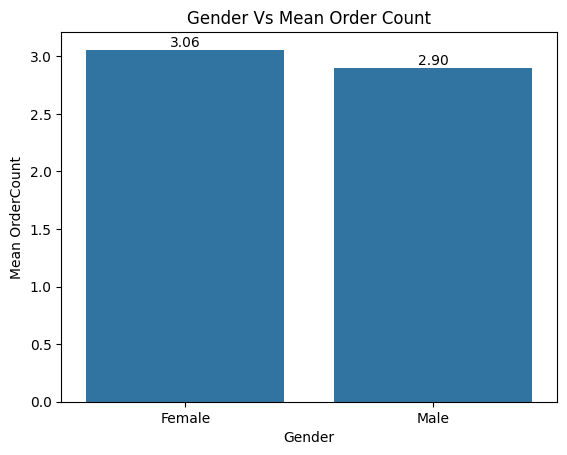

In [ ]:
ax = sns.barplot(x = 'Gender', y = 'Mean OrderCount', data = df_MOC)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')
plt.title("Gender Vs Mean Order Count")
plt.show()

In [ ]:
df_G = churn_data.groupby('Churn')['Gender'].value_counts().to_frame().reset_index()
df_G

,Churn,Gender,count
0,0,Male,2784
1,0,Female,1898
2,1,Male,600
3,1,Female,348


In [ ]:
perc_F_leaving = np.round((df_G.iloc[3][2]/(df_G.iloc[3][2]+df_G.iloc[1][2]))*100,1)
print(f'Percent of Females leaving out of Total Females {perc_F_leaving}%')

Percent of Females leaving out of Total Females 15.5%


In [ ]:
perc_M_leaving = np.round((df_G.iloc[2][2]/(df_G.iloc[2][2]+df_G.iloc[0][2]))*100,1)
print(f'Percent of Males leaving out of Total Males {perc_M_leaving}%')

Percent of Males leaving out of Total Males 17.7%


<b><i>There is no big difference between the Male and Female churn in their own gender.</i></b>

<b>Distribution of Gender in Churn</b>

In [ ]:
df_G_1 = churn_data.groupby('Churn')['Gender'].get_group(1).value_counts().to_frame().reset_index()
df_G_1['Percent'] = np.round(df_G_1['count']/df_G_1['count'].sum()*100,2)
df_G_1

,Gender,count,Percent
0,Male,600,63.29
1,Female,348,36.71


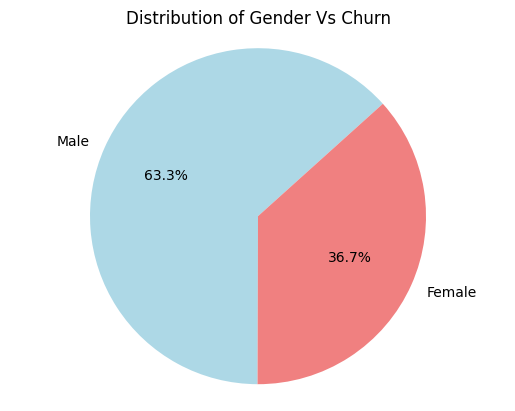

In [ ]:
colors = ['lightblue', 'lightcoral']
plt.pie(df_G_1['Percent'], labels = df_G_1['Gender'], colors=colors, autopct='%1.1f%%', startangle=42)
plt.axis('equal')
plt.title("Distribution of Gender Vs Churn")
plt.show()

<i>Males are more likely to churn. 63.3% are males out of total population of churn </i>

<h4>City Tier Vs Churn</h4>

In [ ]:
#City Tier vs Churn
df_CT = churn_data.groupby('Churn')['CityTier'].value_counts().to_frame().sort_values(by=['Churn','CityTier']).reset_index()
df_CT

,Churn,CityTier,count
0,0,1,3134
1,0,2,194
2,0,3,1354
3,1,1,532
4,1,2,48
5,1,3,368


In [ ]:
df_CT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Churn     6 non-null      int64
 1   CityTier  6 non-null      int64
 2   count     6 non-null      int64
dtypes: int64(3)
memory usage: 272.0 bytes


In [ ]:
df_CT['Churn'] = df_CT['Churn'].astype('str')

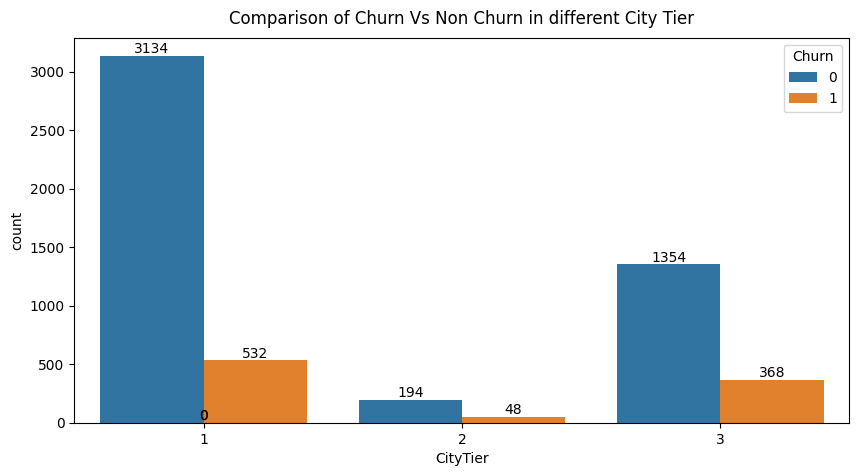

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x='CityTier', y='count',hue='Churn', data=df_CT)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')
plt.title("Comparison of Churn Vs Non Churn in different City Tier",pad=10)
plt.show()

In [ ]:
print("Percentage of Customers churn from different tier of city\n")
for i in range(0,3):
    print(f'CityTier {i+1} - {np.round(df_CT.iloc[i+3][2]/(df_CT.iloc[i+3][2]+df_CT.iloc[i][2])*100,2)}%')

Percentage of Customers churn from different tier of city

CityTier 1 - 14.51%
CityTier 2 - 19.83%
CityTier 3 - 21.37%


In [ ]:
df_CT_1 = churn_data.groupby('Churn')['CityTier'].get_group(1).value_counts().to_frame().sort_values(by='CityTier').reset_index()
df_CT_1['Percent'] = np.round(df_CT_1['count']/df_CT_1['count'].sum()*100,2)
df_CT_1

,CityTier,count,Percent
0,1,532,56.12
1,2,48,5.06
2,3,368,38.82


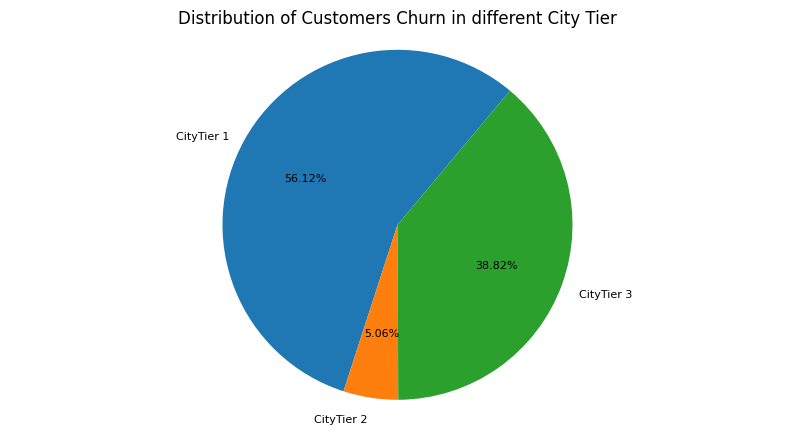

In [ ]:
labels=['CityTier 1', 'CityTier 2', 'CityTier 3']
plt.figure(figsize=(10,5))
plt.pie(df_CT_1['Percent'],labels=labels,autopct='%1.2f%%', startangle=50,textprops={'fontsize': 8, 'verticalalignment': 'top'})
plt.axis('equal')
plt.title("Distribution of Customers Churn in different City Tier")
plt.show()

<i><b>CityTier 1</b> has highest churn rate out of all cities followed by <b>CityTier 3</b> and <b>CityTier2</b>.</i>

<h4>Preferred Payment Mode Vs Churn.</h4>

In [ ]:
#Preferred Payment Mode Vs Churn
churn_data[['PreferredPaymentMode', 'Churn']].value_counts()

PreferredPaymentMode  Churn
Debit Card            0        1958
Credit Card           0        1522
E wallet              0         474
Cash on Delivery      0         386
Debit Card            1         356
UPI                   0         342
Credit Card           1         252
E wallet              1         140
Cash on Delivery      1         128
UPI                   1          72
Name: count, dtype: int64

In [ ]:
#Preferred Payment Mode Vs Churn.
df_PPM = churn_data.groupby('Churn')['PreferredPaymentMode'].value_counts().to_frame().reset_index()
df_PPM

,Churn,PreferredPaymentMode,count
0,0,Debit Card,1958
1,0,Credit Card,1522
2,0,E wallet,474
3,0,Cash on Delivery,386
4,0,UPI,342
5,1,Debit Card,356
6,1,Credit Card,252
7,1,E wallet,140
8,1,Cash on Delivery,128
9,1,UPI,72


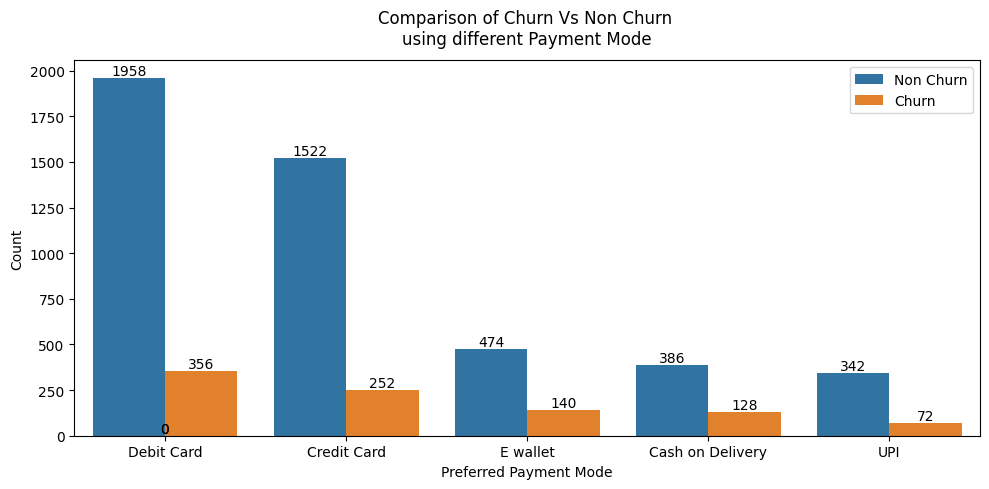

In [ ]:
a=['Non Churn','Non Churn','Non Churn','Non Churn','Non Churn','Churn','Churn','Churn','Churn','Churn']
plt.figure(figsize=(10,5))
ax=sns.barplot(x='PreferredPaymentMode', y='count', data=df_PPM, hue=a)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')
plt.title("Comparison of Churn Vs Non Churn \nusing different Payment Mode",pad=12)
plt.xlabel("Preferred Payment Mode")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
print("Percentage of Customers churn using Different Payment Mode\n")
rn = list(range(5))
pm_mode = list(df_PPM['PreferredPaymentMode'].unique())
for i,j in zip(rn,pm_mode):
    print(f'{j} - {np.round(df_PPM.iloc[i+5][2]/(df_PPM.iloc[i+5][2]+df_PPM.iloc[i][2])*100,2)}%')

Percentage of Customers churn using Different Payment Mode

Debit Card - 15.38%
Credit Card - 14.21%
E wallet - 22.8%
Cash on Delivery - 24.9%
UPI - 17.39%


In [ ]:
df_PPM_1 = churn_data.groupby('Churn')['PreferredPaymentMode'].get_group(1).value_counts().to_frame().reset_index()
df_PPM_1

,PreferredPaymentMode,count
0,Debit Card,356
1,Credit Card,252
2,E wallet,140
3,Cash on Delivery,128
4,UPI,72


In [ ]:
df_PPM_1['Percent'] = np.round(df_PPM_1['count']/df_PPM_1['count'].sum()*100,2)
df_PPM_1

,PreferredPaymentMode,count,Percent
0,Debit Card,356,37.55
1,Credit Card,252,26.58
2,E wallet,140,14.77
3,Cash on Delivery,128,13.50
4,UPI,72,7.59


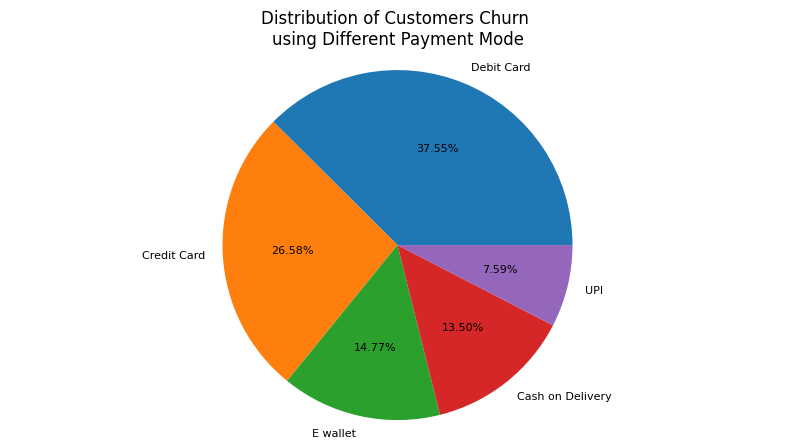

In [ ]:
plt.figure(figsize=(10,5))
plt.pie(df_PPM_1['Percent'],labels=df_PPM_1['PreferredPaymentMode'], autopct='%1.2f%%',textprops={'fontsize': 8})
plt.axis('equal')
plt.title("Distribution of Customers Churn \nusing Different Payment Mode")
plt.show()

<i><b>Debit Card</b> Customers are more likely to churn than any other payment mode</i>

<h4>Satisfaction Score Vs Churn</h4>

In [ ]:
#Satisfaction Score Vs Churn
df_SS = churn_data.groupby('Churn')['SatisfactionScore'].value_counts().to_frame().sort_values(by=['Churn','SatisfactionScore']).reset_index()
df_SS['Churn'] = df_SS['Churn'].astype('str')
df_SS

,Churn,SatisfactionScore,count
0,0,1,1030
1,0,2,512
2,0,3,1406
3,0,4,890
4,0,5,844
5,1,1,134
6,1,2,74
7,1,3,292
8,1,4,184
9,1,5,264


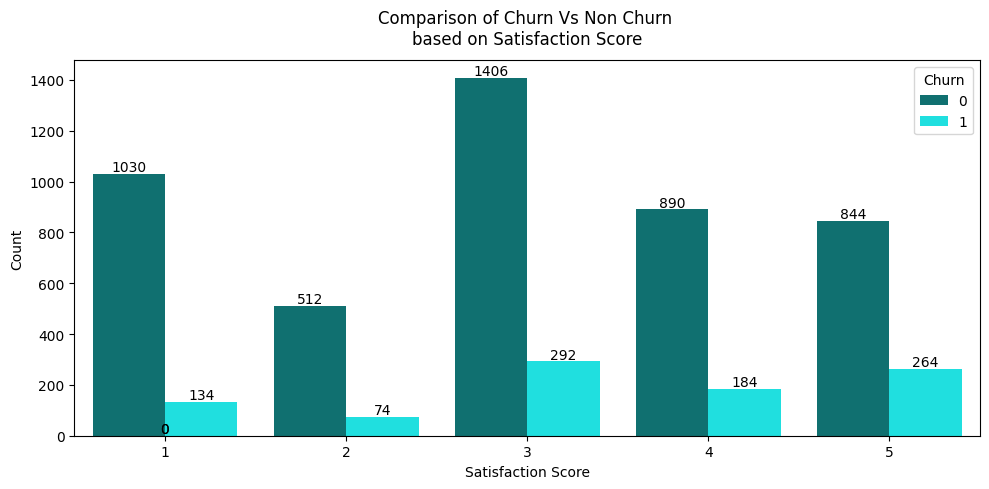

In [ ]:
plt.figure(figsize=(10,5))
palette = ['teal','cyan']
ax=sns.barplot(x='SatisfactionScore', y='count', data=df_SS, hue='Churn',palette=palette)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')
plt.title("Comparison of Churn Vs Non Churn \nbased on Satisfaction Score",pad=12)
plt.xlabel("Satisfaction Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
plt.show()

<b>Higher satisfaction scores strongly associate with lower churn, as expected</b>

<h4>Marital Status Vs Churn</h4>

In [ ]:
#Marital Status Vs Churn
df_MS = churn_data.groupby('Churn')['MaritalStatus'].value_counts().to_frame().sort_values(by=['Churn','MaritalStatus']).reset_index()
df_MS['Churn'] = df_MS['Churn'].astype('str')
df_MS

,Churn,MaritalStatus,count
0,0,Divorced,724
1,0,Married,2642
2,0,Single,1316
3,1,Divorced,124
4,1,Married,344
5,1,Single,480


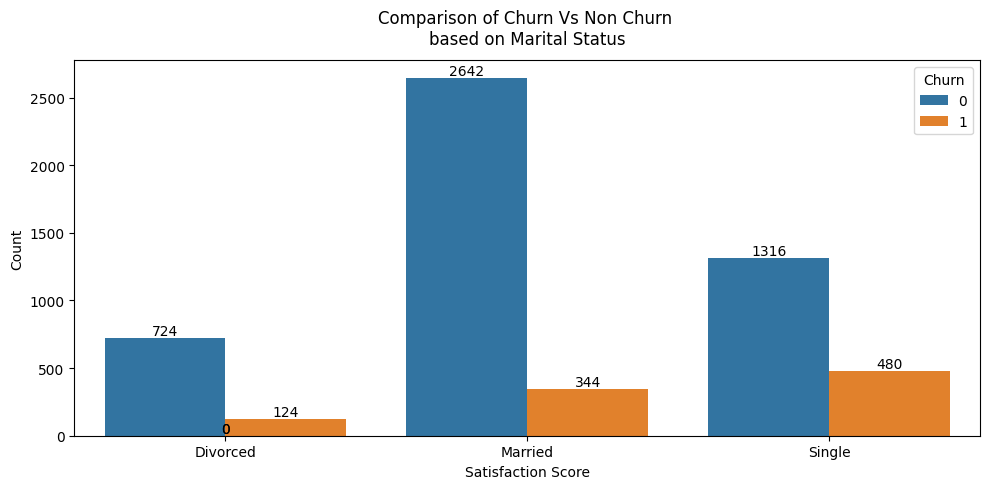

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x='MaritalStatus', y='count', data=df_MS, hue='Churn')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')
plt.title("Comparison of Churn Vs Non Churn \nbased on Marital Status",pad=12)
plt.xlabel("Satisfaction Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
plt.show()

In [ ]:
df_MS_1 = churn_data.groupby('Churn')['MaritalStatus'].get_group(1).value_counts().to_frame().reset_index()
df_MS_1['Percent'] = np.round(df_MS_1['count']/df_MS_1['count'].sum()*100,2)
df_MS_1

,MaritalStatus,count,Percent
0,Single,480,50.63
1,Married,344,36.29
2,Divorced,124,13.08


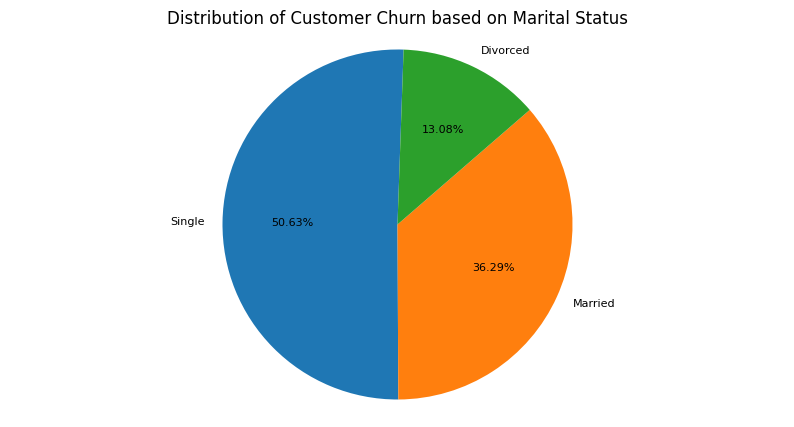

In [ ]:
plt.figure(figsize=(10,5))
plt.pie(df_MS_1['Percent'],labels=df_MS_1['MaritalStatus'], startangle=88, autopct='%1.2f%%',textprops={'fontsize': 8})
plt.title("Distribution of Customer Churn based on Marital Status")
plt.axis('equal')
plt.show()

<b>Single customers</b> represent over half of the total customer churn at <b>480</b> <i>(50.6%)</i>, despite <b>married</b> individuals forming the largest customer segment

<h4>Complain Vs Churn</h4>

In [ ]:
#Complain Vs Churn
df_C = churn_data.groupby('Churn')['Complain'].value_counts().to_frame().sort_values(by=['Complain']).reset_index()
df_C

,Churn,Complain,count
0,0,0,3586
1,1,0,440
2,0,1,1096
3,1,1,508


In [ ]:
df_C['Churn_map']=df_C['Churn'].map({0:'No Churn',1:'Churn'})
df_C['Complain_map']=df_C['Complain'].map({0:'No Complain',1:'Complain'})
df_C

,Churn,Complain,count,Churn_map,Complain_map
0,0,0,3586,No Churn,No Complain
1,1,0,440,Churn,No Complain
2,0,1,1096,No Churn,Complain
3,1,1,508,Churn,Complain


In [ ]:
df = df_C[['Churn_map', 'Complain_map', 'count']]

# Create a pivot table to rearrange the data
pivot_table = df.pivot_table(index='Churn_map', columns='Complain_map', values='count', aggfunc='sum', fill_value=0)

# Display the confusion matrix
print("Confusion Matrix:\n")
print(pivot_table)

Confusion Matrix:

Complain_map  Complain  No Complain
Churn_map                          
Churn              508          440
No Churn          1096         3586


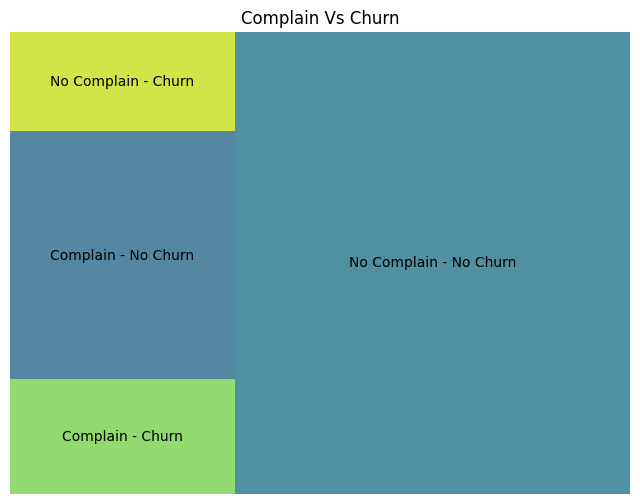

In [ ]:
pivot_df = pivot_table.unstack().reset_index(name='Value')

# Plot the treemap
plt.figure(figsize=(8, 6))  # Set the figure size
squarify.plot(sizes=pivot_df['Value'], label=pivot_df['Complain_map'] + ' - ' + pivot_df['Churn_map'], alpha=.82)
plt.axis('off')
plt.title('Complain Vs Churn')
plt.show()

In [ ]:
pivot_df['Value']

0     508
1    1096
2     440
3    3586
Name: Value, dtype: int64

<h4>CouponUsed Vs Churn</h4>

In [ ]:
#CouponUsed Vs Churn
df_CU=churn_data.groupby('Churn')['CouponUsed'].value_counts().to_frame().sort_values(by=['CouponUsed','Churn']).reset_index()
df_CU['Churn']=df_CU['Churn'].astype('str')
df_CU

,Churn,CouponUsed,count
0,0,0.00,844
1,1,0.00,186
2,0,1.00,1727
3,1,1.00,378
4,0,1.75,248
5,1,1.75,8
6,0,2.00,1061
7,1,2.00,222
8,0,3.00,281
9,1,3.00,46


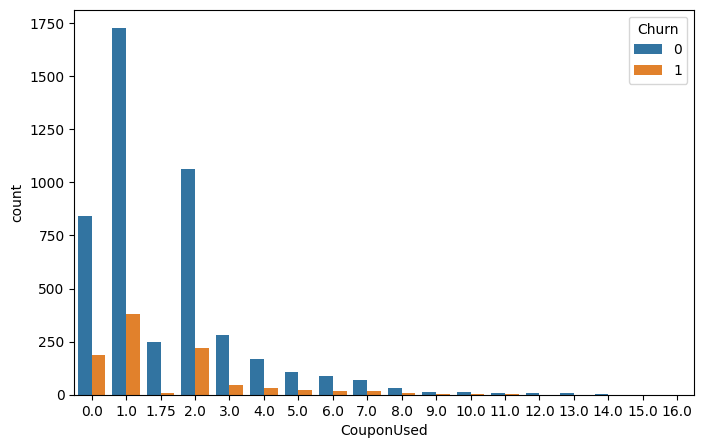

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='CouponUsed',y='count',data=df_CU,hue='Churn')
plt.legend(title='Churn', loc='upper right')
plt.show()

<h4>Correlation among Variables</h4>

In [ ]:
#Coorelation
churn_data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1,5,159.93
1,50002,1,9,Mobile Phone,1,8,UPI,Male,3,4,Mobile Phone,3,Single,7,1,15.0,0.0,1,0,120.90
2,50003,1,9,Mobile Phone,1,30,Debit Card,Male,2,4,Mobile Phone,3,Single,6,1,14.0,0.0,1,3,120.28
3,50004,1,0,Mobile Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1,3,134.07
4,50005,1,0,Mobile Phone,1,12,Credit Card,Male,3,3,Mobile Phone,5,Single,3,0,11.0,1.0,1,3,129.60


<h5>Categorizing Variables on their Nature</h5>

* <b>Numerical Variables</b> - <i>Tenure, WarehouseToHome, NumberOfAddress, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount</i>
* <b>Categorical Variables</b> - <i>CityTier, HourSpendOnApp, NumberOfDeviceRegistered, SatisfactionScore, Complain, PreferredLoginDevice, PreferredPaymentMode, Gender, PreferedOrderCat, MaritalStatus</i>
                                    


In [ ]:
df_num = churn_data[['Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed',
                     'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']]
df_num.head()

,Tenure,WarehouseToHome,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4,6,9,11.0,1.0,1,5,159.93
1,9,8,7,15.0,0.0,1,0,120.90
2,9,30,6,14.0,0.0,1,3,120.28
3,0,15,8,23.0,0.0,1,3,134.07
4,0,12,3,11.0,1.0,1,3,129.60


<b>Providing indicators to the Categorical Variables</b>

In [ ]:
df_cat=churn_data[['CityTier', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'Complain',
         'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']]
df_cat.head()

,CityTier,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,Complain,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,3,3,3,2,1,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,1,3,4,3,1,Mobile Phone,UPI,Male,Mobile Phone,Single
2,1,2,4,3,1,Mobile Phone,Debit Card,Male,Mobile Phone,Single
3,3,2,4,5,0,Mobile Phone,Debit Card,Male,Laptop & Accessory,Single
4,1,3,3,5,0,Mobile Phone,Credit Card,Male,Mobile Phone,Single


In [ ]:
print(df_cat['PreferredLoginDevice'].unique())
print(df_cat['PreferredPaymentMode'].unique())
print(df_cat['Gender'].unique())
print(df_cat['PreferedOrderCat'].unique())
print(df_cat['MaritalStatus'].unique())

['Mobile Phone' 'Computer']
['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']
['Female' 'Male']
['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
['Single' 'Divorced' 'Married']


In [ ]:
df_cat['PreferredLoginDevice']  = df_cat['PreferredLoginDevice'].map({'Mobile Phone':1, 'Computer':2})
df_cat['PreferredPaymentMode'] = df_cat['PreferredPaymentMode'].map({'Debit Card':1,'UPI':2,'Credit Card':3,'Cash on Delivery':4,'E wallet':5})
df_cat['Gender'] = df_cat['Gender'].map({'Female':1,'Male':2})
df_cat['PreferedOrderCat'] = df_cat['PreferedOrderCat'].map({'Laptop & Accessory':1,'Mobile Phone':2,'Others':3,'Fashion':4,'Grocery':5})
df_cat['MaritalStatus'] = df_cat['MaritalStatus'].map({'Single':1,'Divorced':2,'Married':3})

In [ ]:
df_cat.head()

,CityTier,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,Complain,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,3,3,3,2,1,1,1,1,1,1
1,1,3,4,3,1,1,2,2,2,1
2,1,2,4,3,1,1,1,2,2,1
3,3,2,4,5,0,1,1,2,1,1
4,1,3,3,5,0,1,3,2,2,1


In [ ]:
new_df=pd.concat([df_num,df_cat], axis = 1)
new_df.head()

,Tenure,WarehouseToHome,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CityTier,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,Complain,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,4,6,9,11.0,1.0,1,5,159.93,3,3,3,2,1,1,1,1,1,1
1,9,8,7,15.0,0.0,1,0,120.90,1,3,4,3,1,1,2,2,2,1
2,9,30,6,14.0,0.0,1,3,120.28,1,2,4,3,1,1,1,2,2,1
3,0,15,8,23.0,0.0,1,3,134.07,3,2,4,5,0,1,1,2,1,1
4,0,12,3,11.0,1.0,1,3,129.60,1,3,3,5,0,1,3,2,2,1


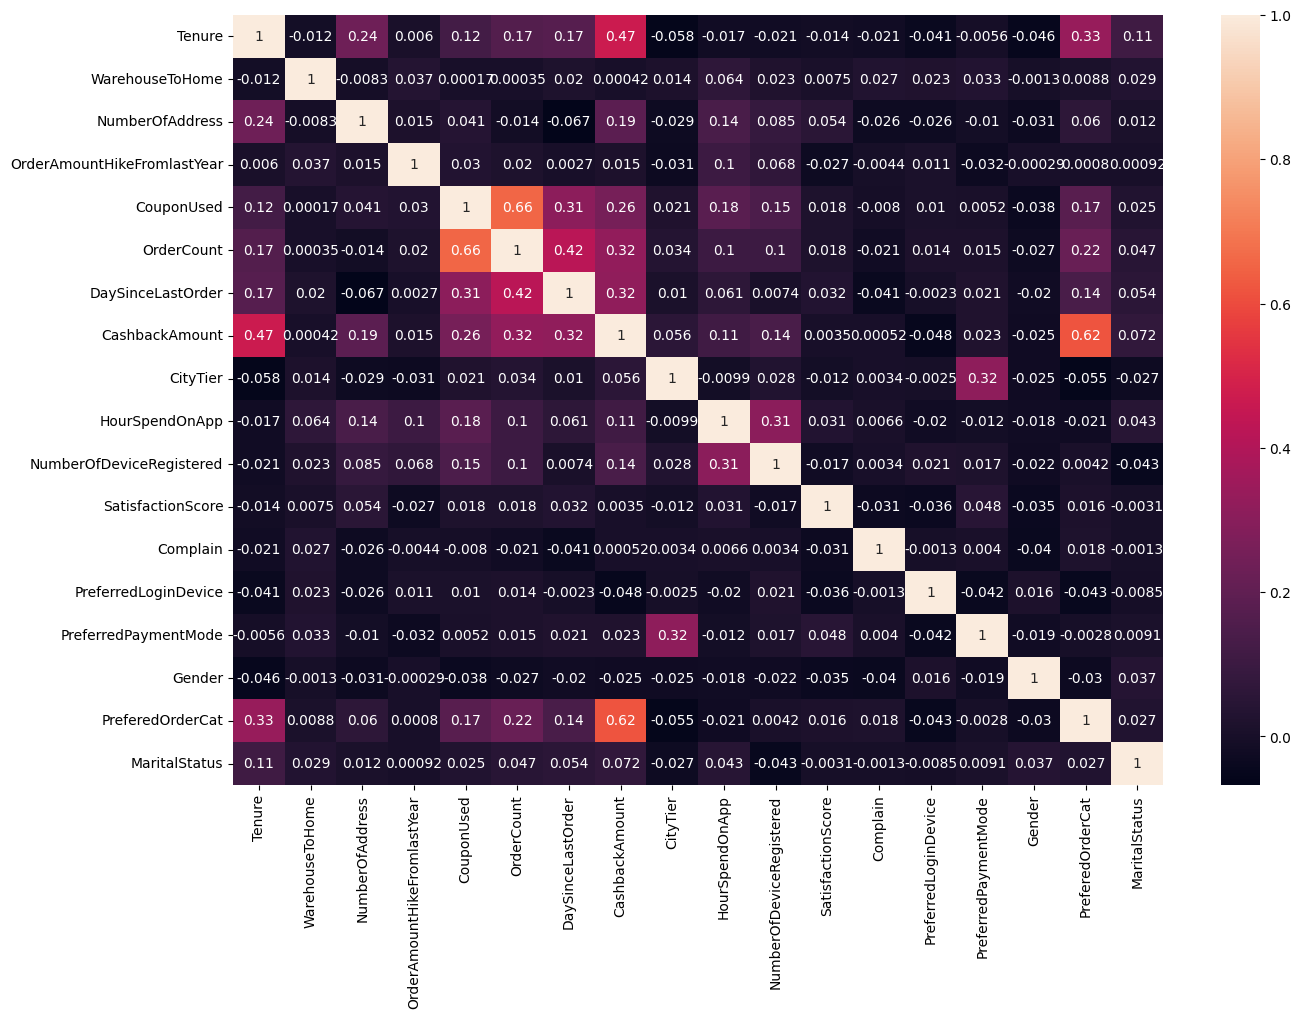

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(new_df.corr(), annot = True)
plt.show()

<h3>Data Modelling</h3>

In [ ]:
#Data Modelling
churn_data = pd.read_excel('/content/Ecomm Cleaned Dataset.xlsx')
churn_data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1,5,159.93
1,50002,1,9,Mobile Phone,1,8,UPI,Male,3,4,Mobile Phone,3,Single,7,1,15.0,0.0,1,0,120.90
2,50003,1,9,Mobile Phone,1,30,Debit Card,Male,2,4,Mobile Phone,3,Single,6,1,14.0,0.0,1,3,120.28
3,50004,1,0,Mobile Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1,3,134.07
4,50005,1,0,Mobile Phone,1,12,Credit Card,Male,3,3,Mobile Phone,5,Single,3,0,11.0,1.0,1,3,129.60


In [ ]:
churn_data['PreferredLoginDevice']  = churn_data['PreferredLoginDevice'].map({'Mobile Phone':1, 'Computer':2})
churn_data['PreferredPaymentMode'] = churn_data['PreferredPaymentMode'].map({'Debit Card':1,'UPI':2,'Credit Card':3,'Cash on Delivery':4,'E wallet':5})
churn_data['Gender'] = churn_data['Gender'].map({'Female':1,'Male':2})
churn_data['PreferedOrderCat'] = churn_data['PreferedOrderCat'].map({'Laptop & Accessory':1,'Mobile Phone':2,'Others':3,'Fashion':4,'Grocery':5})
churn_data['MaritalStatus'] = churn_data['MaritalStatus'].map({'Single':1,'Divorced':2,'Married':3})

In [ ]:
churn_data.head()

In [ ]:
np.round(churn_data['Churn'].value_counts()/churn_data.shape[0]*100,2)

Churn
0    83.16
1    16.84
Name: count, dtype: float64

<b><i>Dataset is imbalanced as it contains less number of customers that churn.</i></b><br>
<b>SMOTE</b> <i>(Synthetic Minority Over-sampling Technique)</i> - It generates synthetic samples for the minority class by interpolating between existing instances. Thus helping the machine learning model to undestand data effectively and provide better results.

<h4>Handling Imbalanced Data</h4>

In [ ]:
#handling imbalanced data
pip install imbalanced-learn

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

In [ ]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('tomek', TomekLinks())
])

In [ ]:
X = churn_data.drop(['Churn', 'CustomerID'], axis = 1)
y = churn_data['Churn']

In [ ]:
X_resampled, y_resampled = pipeline.fit_resample(X, y)

In [ ]:
X_resampled.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4,1,3,6,1,1,3,3,1,2,1,9,1,11.0,1.0,1,5,159.93
1,9,1,1,8,2,2,3,4,2,3,1,7,1,15.0,0.0,1,0,120.90
2,9,1,1,30,1,2,2,4,2,3,1,6,1,14.0,0.0,1,3,120.28
3,0,1,3,15,1,2,2,4,1,5,1,8,0,23.0,0.0,1,3,134.07
4,0,1,1,12,3,2,3,3,2,5,1,3,0,11.0,1.0,1,3,129.60


In [ ]:
churn_data_os = X_resampled.copy()

In [ ]:
churn_data_os['Churn'] = y_resampled

In [ ]:
churn_data_os.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
0,4,1,3,6,1,1,3,3,1,2,1,9,1,11.0,1.0,1,5,159.93,1
1,9,1,1,8,2,2,3,4,2,3,1,7,1,15.0,0.0,1,0,120.90,1
2,9,1,1,30,1,2,2,4,2,3,1,6,1,14.0,0.0,1,3,120.28,1
3,0,1,3,15,1,2,2,4,1,5,1,8,0,23.0,0.0,1,3,134.07,1
4,0,1,1,12,3,2,3,3,2,5,1,3,0,11.0,1.0,1,3,129.60,1


In [ ]:
np.round(churn_data_os['Churn'].value_counts()/churn_data_os.shape[0]*100,2)

Churn
1    50.0
0    50.0
Name: count, dtype: float64

In [ ]:
churn_data_os.shape

(9364, 19)

<h4>Data Splitting</h4>

In [ ]:
#data splitting
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
X = churn_data_os.drop(['Churn'], axis = 1)
y = churn_data_os['Churn']

Splitting the data into Train and Test dataset.

In [ ]:
X_test = X.sample(frac=0.25, random_state=42)
X_test.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1791,14,2,3,16,1,2,2,3,1,1,1,8,0,14.000000,0.000000,1,10,162.300000
3884,21,1,3,9,1,1,3,2,5,4,3,8,0,15.000000,1.750000,2,3,284.720000
8676,19,1,1,14,3,2,2,3,2,2,1,4,0,23.062585,0.882823,1,0,124.916551
9131,1,1,3,14,5,2,3,4,2,4,1,3,0,14.000000,1.012578,2,1,151.790000
7785,1,1,2,21,4,1,3,4,1,3,1,5,0,12.182809,1.182809,2,3,223.485157


In [ ]:
y_test = y.sample(frac=.25, random_state=42)

In [ ]:
print(X_test.shape)
print(y_test.shape)

(2341, 18)
(2341,)


In [ ]:
X_indices = X_test.index
y_indices = y_test.index

In [ ]:
X_drop_index = X.drop(X_indices)
y_drop_index = y.drop(y_indices)

In [ ]:
print(X_drop_index.shape)
print(y_drop_index.shape)

(7023, 18)
(7023,)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_drop_index, y_drop_index, test_size=0.25, random_state=42)

In [ ]:
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])

Training set size: 5267
Validation set size: 1756


<h3>Algorithms</h3>

<h4>Logistic Regression</h4>

In [ ]:
#applying algorithms in hte data
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
model_log = LogisticRegression(random_state=42)

model_log.fit(X_train, y_train)

y_val_log = model_log.predict(X_val)
y_test_log = model_log.predict(X_test)

# Evaluate the performance of the model
val_acc_log = accuracy_score(y_val, y_val_log)
test_acc_log = accuracy_score(y_test,y_test_log)
print("Training Accuracy:", val_acc_log)
print("Test Accuracy:", test_acc_log)
print("Classification Report:")
print(classification_report(y_test, y_test_log))

Training Accuracy: 0.7761958997722096
Test Accuracy: 0.7804357112345152
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1170
           1       0.77      0.81      0.79      1171

    accuracy                           0.78      2341
   macro avg       0.78      0.78      0.78      2341
weighted avg       0.78      0.78      0.78      2341



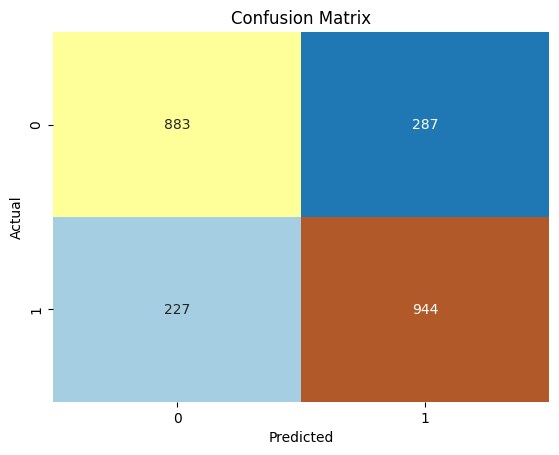

In [ ]:
cm = confusion_matrix(y_test, y_test_log)
#print("Confusion Matrix:\n", cm)

# Step 6: Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Paired', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
log_reg_feature_importances = model_log.coef_[0]
log_reg_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': abs(log_reg_feature_importances)})
log_reg_importance_df = log_reg_importance_df.sort_values(by = 'Importance', ascending = False).reset_index(drop = True)
log_reg_importance_df.head()

,Feature,Importance
0,Complain,0.766760
1,MaritalStatus,0.660995
2,PreferedOrderCat,0.463053
3,NumberOfDeviceRegistered,0.401848
4,HourSpendOnApp,0.360629


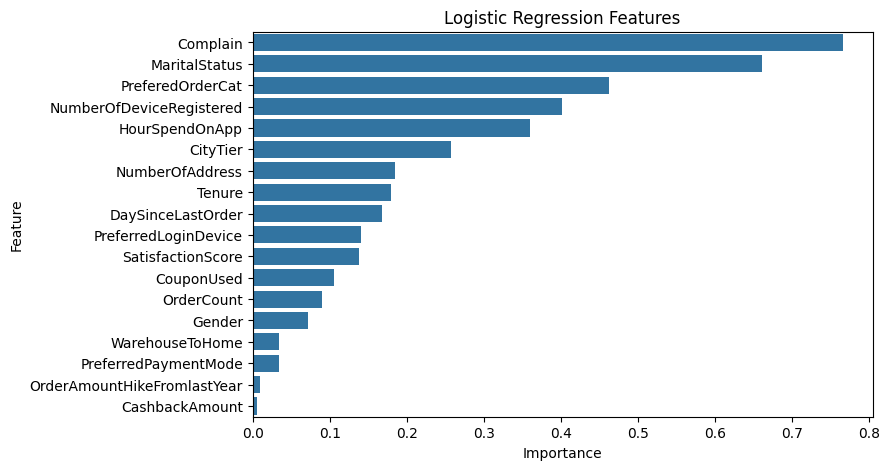

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'Importance', y = 'Feature', data = log_reg_importance_df)
plt.title("Logistic Regression Features")
plt.show()

<h4>Decision Tree</h4>

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

y_val_dt = model_dt.predict(X_val)
y_test_dt = model_dt.predict(X_test)

val_acc_dt = accuracy_score(y_val, y_val_dt)
test_acc_dt = accuracy_score(y_test, y_test_dt)

print("Training Accuracy:", val_acc_dt)
print("Test Accuracy:", test_acc_dt)
print("Classification Report:")
print(classification_report(y_test, y_test_dt))

Training Accuracy: 0.893507972665148
Test Accuracy: 0.9060230670653567
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1170
           1       0.89      0.92      0.91      1171

    accuracy                           0.91      2341
   macro avg       0.91      0.91      0.91      2341
weighted avg       0.91      0.91      0.91      2341



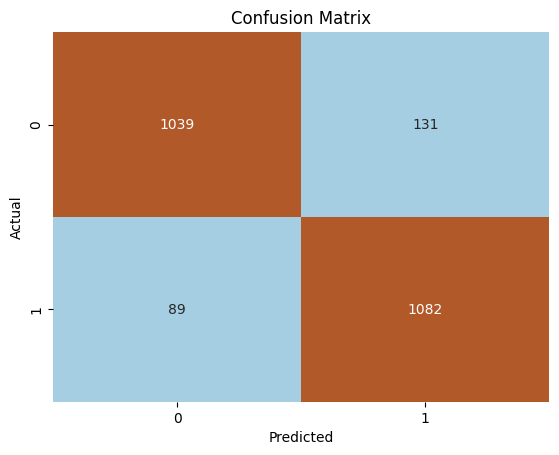

In [ ]:
cm = confusion_matrix(y_test, y_test_dt)
#print("Confusion Matrix:\n", cm)

# Step 6: Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Paired', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
dt_feature_importances = model_dt.feature_importances_
dt_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': dt_feature_importances})
dt_importance_df = dt_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop = True)
dt_importance_df.head()

,Feature,Importance
0,Tenure,0.373243
1,CashbackAmount,0.119258
2,WarehouseToHome,0.064079
3,OrderAmountHikeFromlastYear,0.054641
4,MaritalStatus,0.053179


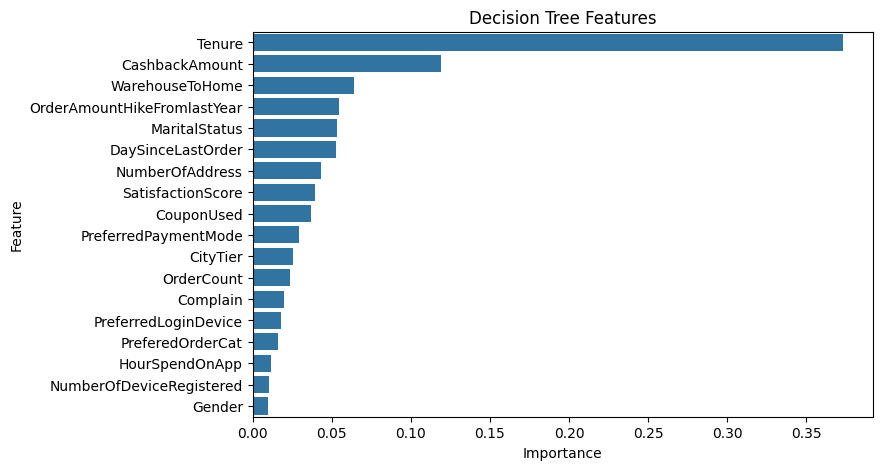

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'Importance', y = 'Feature', data = dt_importance_df)
plt.title("Decision Tree Features")
plt.show()

<h4>Random Forest</h4>

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

model_rf.fit(X_train, y_train)

y_val_rf = model_rf.predict(X_val)
y_test_rf = model_rf.predict(X_test)

val_acc_rf = accuracy_score(y_val, y_val_rf)
test_acc_rf = accuracy_score(y_test,y_test_rf)

print("Training Accuracy:", val_acc_rf)
print("Test Accuracy:", test_acc_rf)
print("Classification Report:")
print(classification_report(y_test, y_test_rf))

Training Accuracy: 0.9584282460136674
Test Accuracy: 0.964545066211021
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1170
           1       0.95      0.98      0.97      1171

    accuracy                           0.96      2341
   macro avg       0.97      0.96      0.96      2341
weighted avg       0.97      0.96      0.96      2341



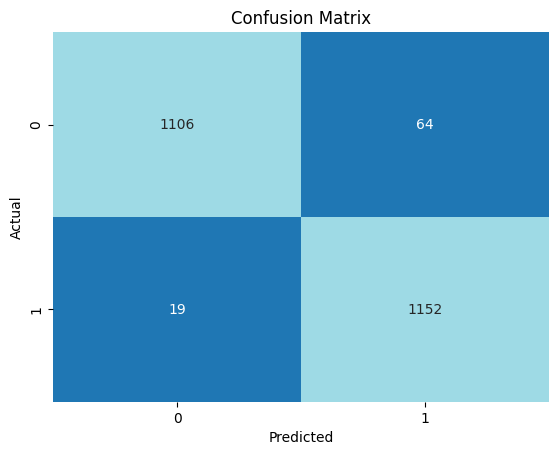

In [ ]:
cm = confusion_matrix(y_test, y_test_rf)
#print("Confusion Matrix:\n", cm)

# Step 6: Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='tab20', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
rf_feature_importances = model_rf.feature_importances_
rf_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_feature_importances})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop = True)
rf_importance_df.head()

,Feature,Importance
0,Tenure,0.281026
1,CashbackAmount,0.110031
2,MaritalStatus,0.078190
3,DaySinceLastOrder,0.068695
4,OrderAmountHikeFromlastYear,0.064826


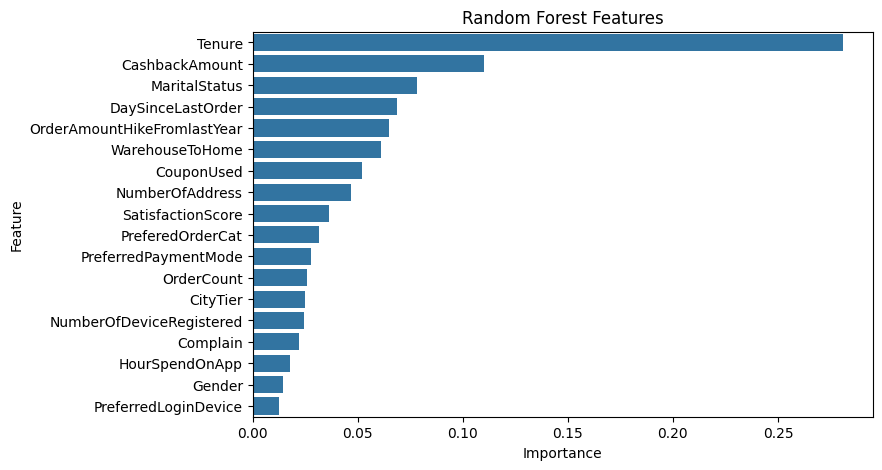

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'Importance', y = 'Feature', data = rf_importance_df)
plt.title("Random Forest Features")
plt.show()

<h4>Gradient Boosting</h4>

In [ ]:
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

model_gb.fit(X_train, y_train)

y_val_gb = model_gb.predict(X_val)
y_test_gb = model_gb.predict(X_test)

val_acc_gb = accuracy_score(y_val, y_val_gb)
test_acc_gb = accuracy_score(y_test, y_test_gb)

print("Training Accuracy:", val_acc_gb)
print("Test Accuracy:", test_acc_gb)
print("Classification Report:")
print(classification_report(y_test, y_test_gb))

Training Accuracy: 0.9054669703872438
Test Accuracy: 0.8996155489107219
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1170
           1       0.90      0.90      0.90      1171

    accuracy                           0.90      2341
   macro avg       0.90      0.90      0.90      2341
weighted avg       0.90      0.90      0.90      2341



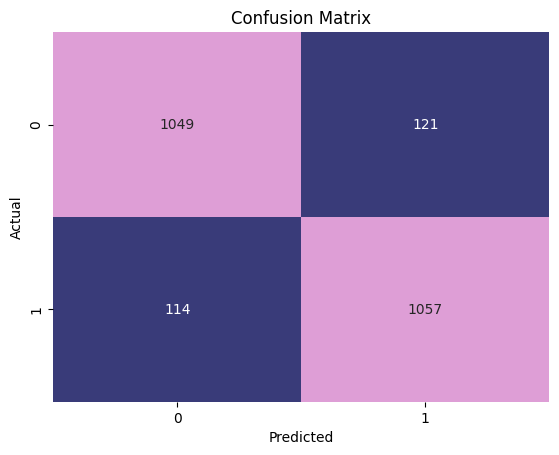

In [ ]:
cm = confusion_matrix(y_test, y_test_gb)
#print("Confusion Matrix:\n", cm)

# Step 6: Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='tab20b', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
gb_feature_importances = model_gb.feature_importances_
gb_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': gb_feature_importances})
gb_importance_df = gb_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop = True)
gb_importance_df.head()

,Feature,Importance
0,Tenure,0.506385
1,CashbackAmount,0.097739
2,CouponUsed,0.093904
3,MaritalStatus,0.074008
4,DaySinceLastOrder,0.042741


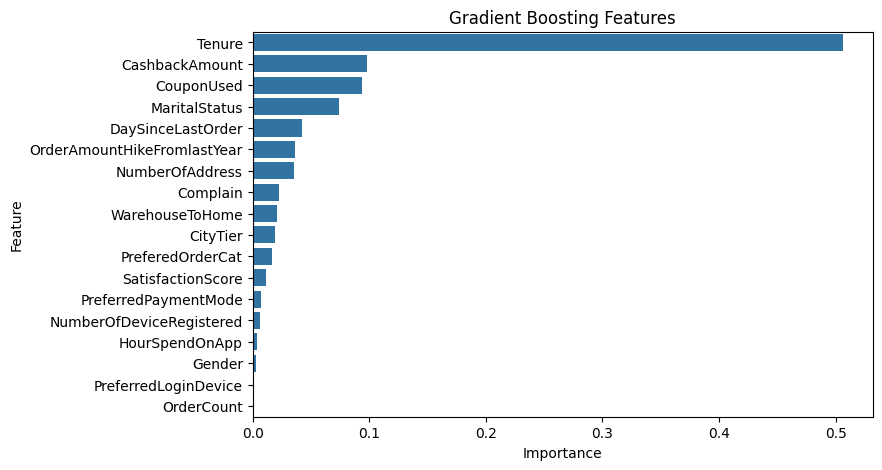

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'Importance', y = 'Feature', data = gb_importance_df)
plt.title("Gradient Boosting Features")
plt.show()

<h4>AdaBoost</h4>

In [ ]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model_ab = AdaBoostClassifier(n_estimators=100, random_state=42)

model_ab.fit(X_train, y_train)

y_val_ab = model_ab.predict(X_val)
y_test_ab = model_ab.predict(X_test)

val_acc_ab = accuracy_score(y_val, y_val_ab)
test_acc_ab = accuracy_score(y_test,y_test_ab)

print("Training Accuracy:", val_acc_ab)
print("Test Accuracy:", test_acc_ab)
print("Classification Report:")
print(classification_report(y_test, y_test_ab))

Training Accuracy: 0.8707289293849658
Test Accuracy: 0.8688594617684751
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1170
           1       0.87      0.87      0.87      1171

    accuracy                           0.87      2341
   macro avg       0.87      0.87      0.87      2341
weighted avg       0.87      0.87      0.87      2341



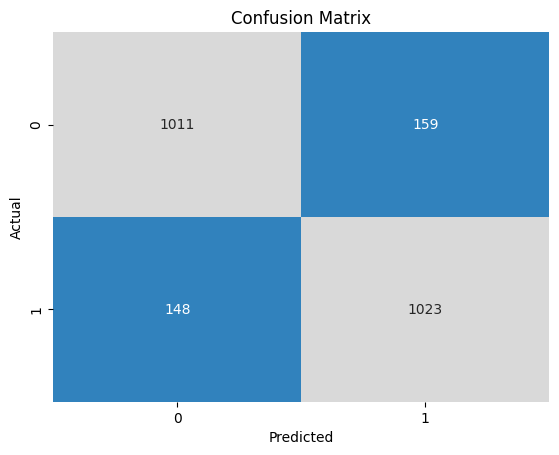

In [ ]:
cm = confusion_matrix(y_test, y_test_ab)
#print("Confusion Matrix:\n", cm)

# Step 6: Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='tab20c', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
ada_feature_importances = model_ab.feature_importances_
ada_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': ada_feature_importances})
ada_importance_df = ada_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop = True)
ada_importance_df.head()

,Feature,Importance
0,OrderAmountHikeFromlastYear,0.28
1,CouponUsed,0.28
2,CashbackAmount,0.13
3,Tenure,0.05
4,CityTier,0.05


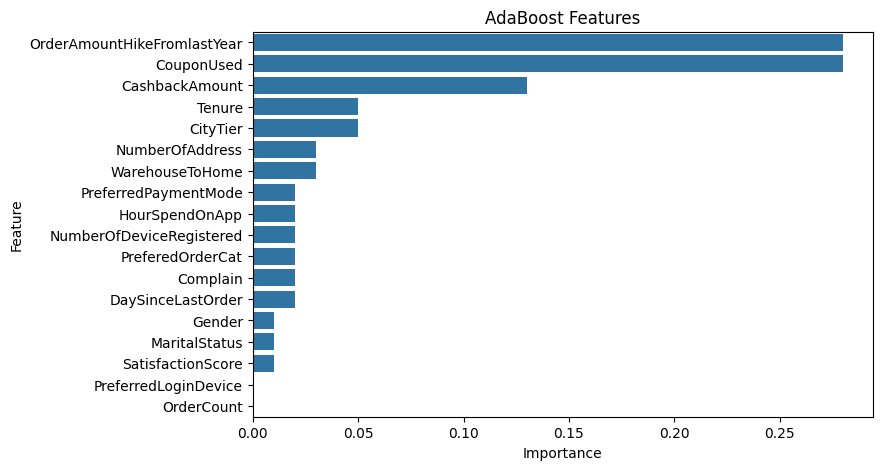

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'Importance', y = 'Feature', data = ada_importance_df)
plt.title("AdaBoost Features")
plt.show()

<h3>Model Evaluation</h3>

<h4>Logistic Regression</h4>

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

ROC AUC Score: 0.8636230564629856


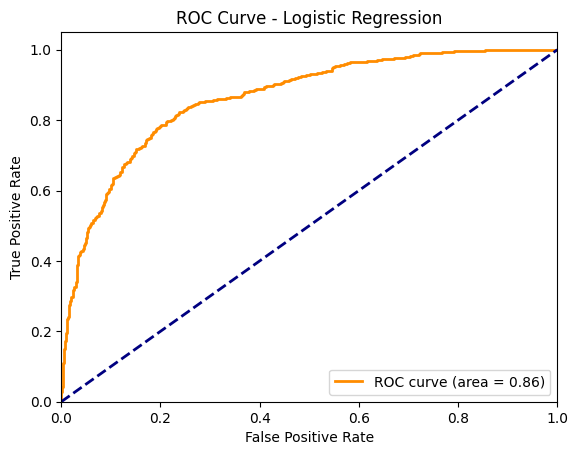

In [ ]:
y_probs_log = model_log.predict_proba(X_val)[:, 1]  # Probabilities of the positive class

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_val, y_probs_log)
print("ROC AUC Score:", roc_auc)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_probs_log)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

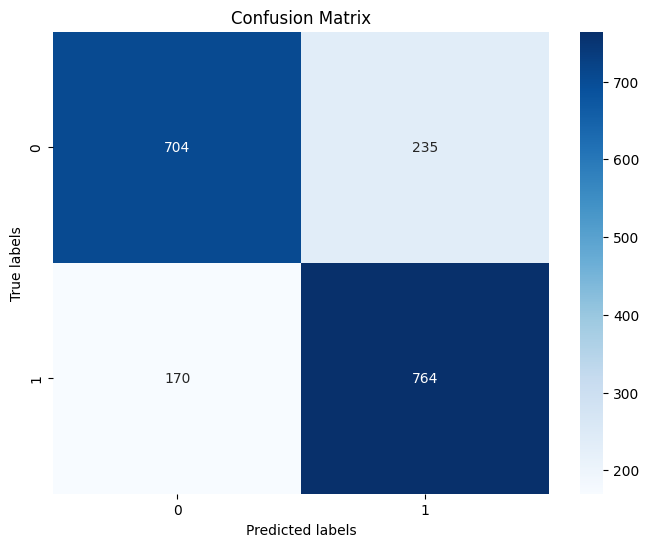

In [ ]:
cm = confusion_matrix(y_test, y_test_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

<h4>Decision Tree</h4>

ROC AUC Score: 0.9026133990253308


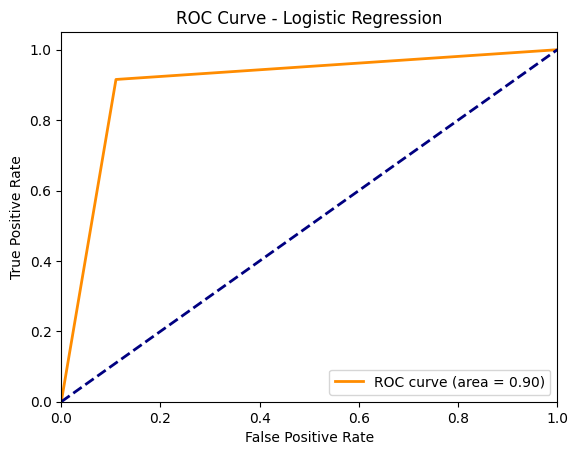

In [ ]:
y_probs_dt = model_dt.predict_proba(X_val)[:, 1]  # Probabilities of the positive class

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_val, y_probs_dt)
print("ROC AUC Score:", roc_auc)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_probs_dt)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

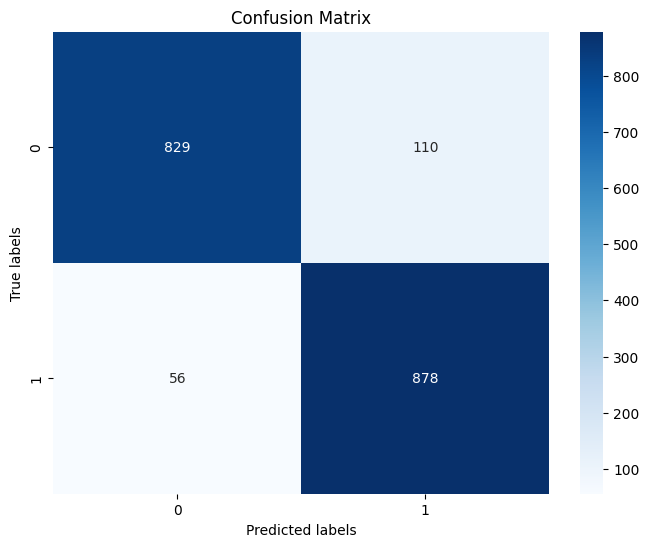

In [ ]:
cm = confusion_matrix(y_test, y_test_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

<h4>Random Forest</h4>

ROC AUC Score: 0.9934209821667649


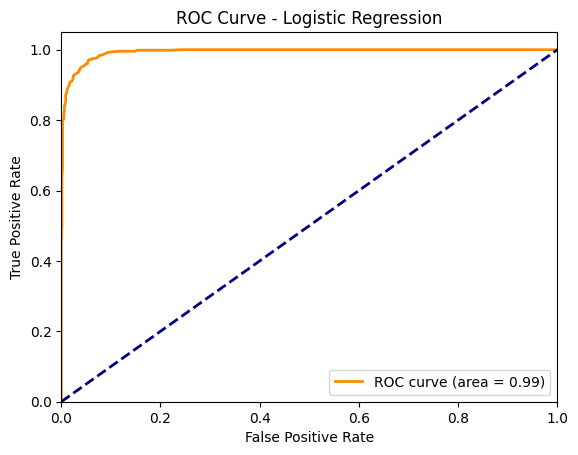

In [ ]:
y_probs_rf = model_rf.predict_proba(X_val)[:, 1]  # Probabilities of the positive class

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_val, y_probs_rf)
print("ROC AUC Score:", roc_auc)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_probs_rf)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

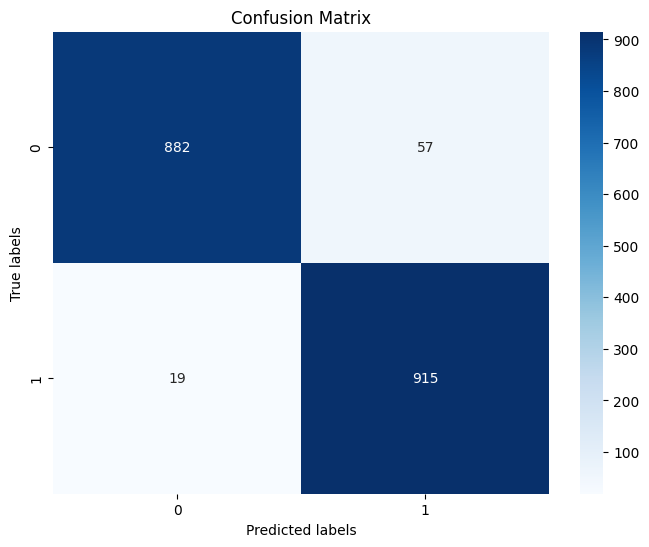

In [ ]:
cm = confusion_matrix(y_test, y_test_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

<h4>Gradient Boosting</h4>

ROC AUC Score: 0.9605580249558185


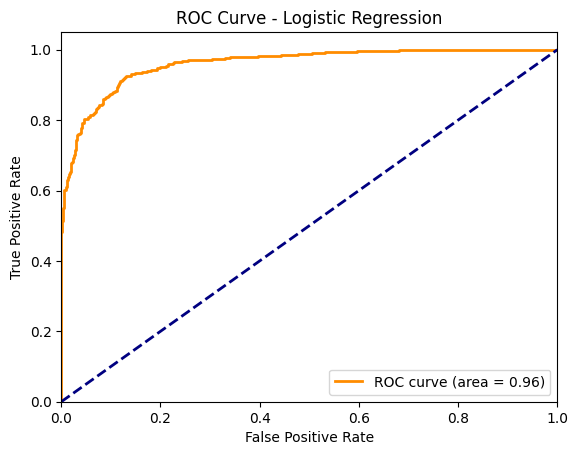

In [ ]:
y_probs_gb = model_gb.predict_proba(X_val)[:, 1]  # Probabilities of the positive class

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_val, y_probs_gb)
print("ROC AUC Score:", roc_auc)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_probs_gb)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

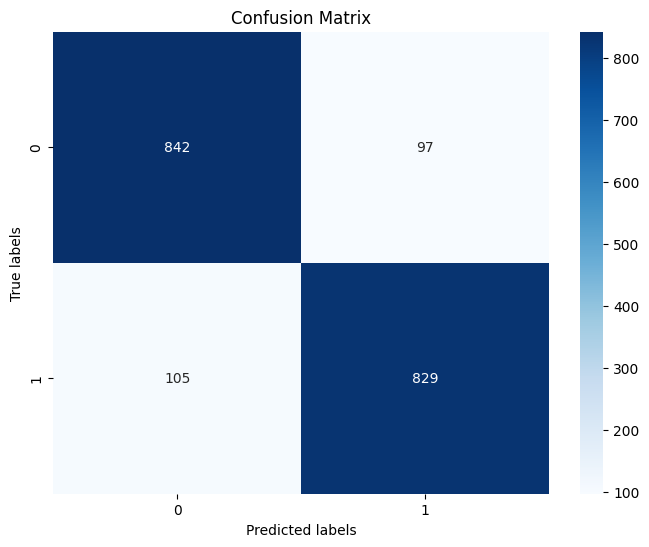

In [ ]:
cm = confusion_matrix(y_test, y_test_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

<h4>Ada Boost</h4>

ROC AUC Score: 0.949962512718899


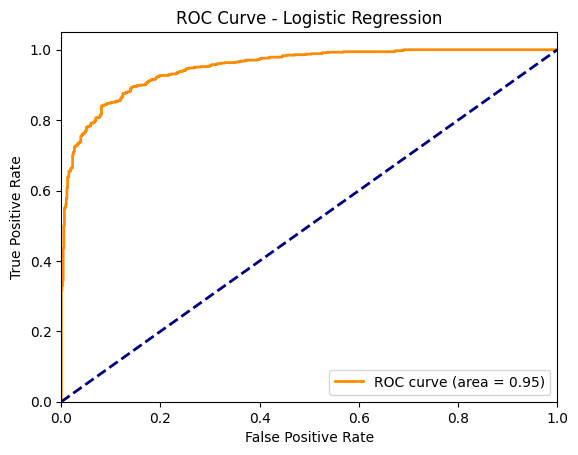

In [ ]:
y_probs_ab = model_ab.predict_proba(X_val)[:, 1]  # Probabilities of the positive class

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_val, y_probs_ab)
print("ROC AUC Score:", roc_auc)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_probs_ab)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Ada Boost')
plt.legend(loc="lower right")
plt.show()

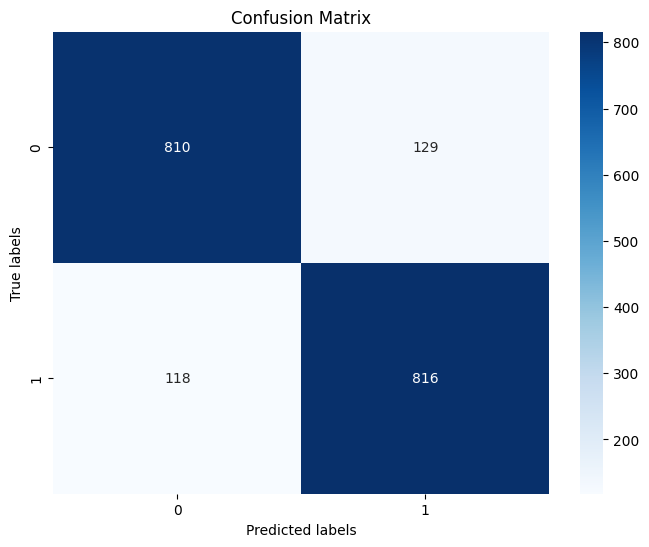

In [ ]:
cm = confusion_matrix(y_test, y_test_ab)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

<h3>Model Peformance Evaluation</h3>

In [ ]:
#model performance evaluation
values = [
    ['Logistic Regression', val_acc_log, test_acc_log],
    ['Decision Tree', val_acc_dt, test_acc_dt],
    ['Random Forest', val_acc_rf, test_acc_rf],
    ['Gradient Boosting', val_acc_gb, test_acc_gb],
    ['Ada Boost', val_acc_ab, test_acc_ab]]

model_pf = pd.DataFrame(values, columns = ['Algorithms', 'Train Accuracy', 'Test Accuracy'])
model_pf

,Algorithms,Train Accuracy,Test Accuracy
0,Logistic Regression,0.776196,0.780436
1,Decision Tree,0.893508,0.906023
2,Random Forest,0.958428,0.964545
3,Gradient Boosting,0.905467,0.899616
4,Ada Boost,0.870729,0.868859


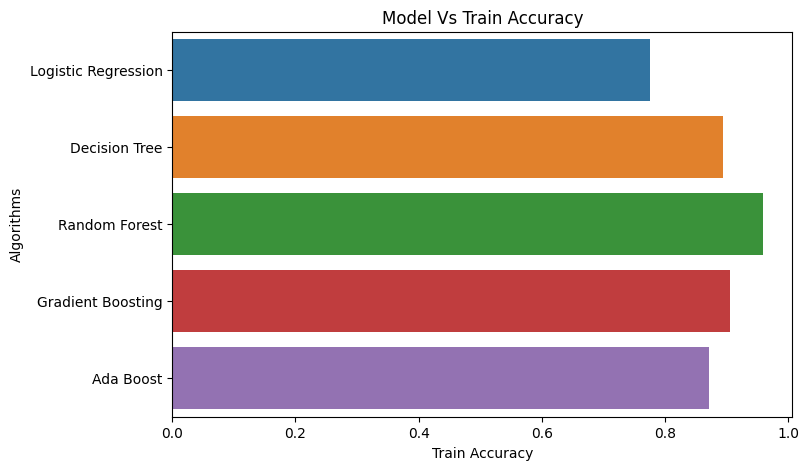

In [ ]:
plt.figure(figsize =(8,5))
sns.barplot(y = 'Algorithms', x = 'Train Accuracy', data = model_pf, hue = 'Algorithms')
plt.title("Model Vs Train Accuracy")
plt.show()

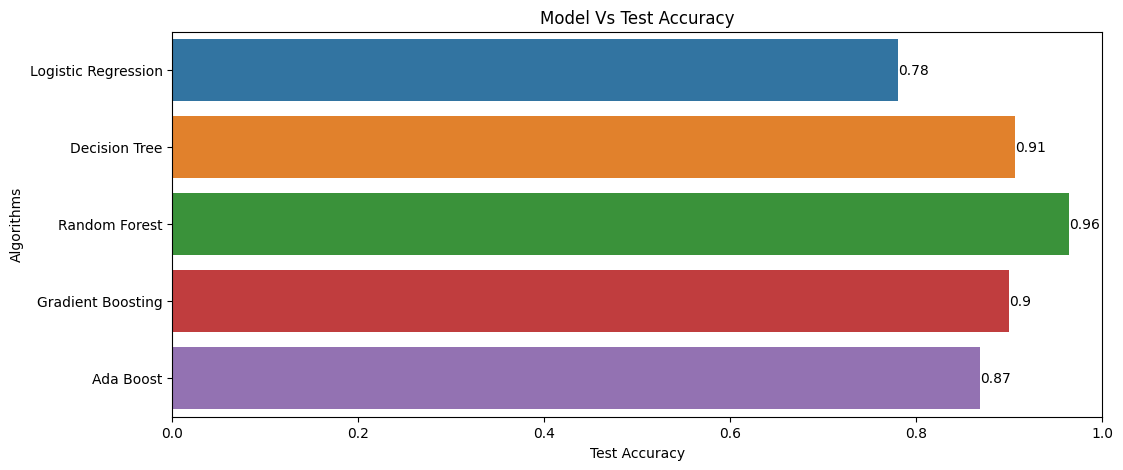

In [ ]:
plt.figure(figsize =(12,5))
barplot = sns.barplot(y = 'Algorithms', x = 'Test Accuracy', data = model_pf, hue = 'Algorithms')
for index, row in model_pf.iterrows():
    barplot.text(row['Test Accuracy'], index, round(row['Test Accuracy'], 2), color='black', ha="left", va='center')
plt.title("Model Vs Test Accuracy")
plt.xlabel('Test Accuracy')
plt.ylabel('Algorithms')
plt.xlim(0, 1)  # Assuming the accuracy is between 0 and 1
plt.show()

<h4>Random Forest > Decision Tree > Gradient Boosting > Ada Boost > Logistic Regression </h4>